# USA HOUSE PRICE PREDICTION

The goal of this data set is to predict the house price by using regression machine learning ,
we have access total 7 feature and 5000 rows to perform this data set 

 Importing important libraries and csv file

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [124]:
df= pd.read_csv(r"C:\ravi\ml\USA_Housing.csv")

# Data preprocessing and EDA

In [125]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [126]:
df.shape

(5000, 7)

In [127]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [128]:
# checkng null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [129]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [130]:
df.mean()

Avg. Area Income                6.858311e+04
Avg. Area House Age             5.977222e+00
Avg. Area Number of Rooms       6.987792e+00
Avg. Area Number of Bedrooms    3.981330e+00
Area Population                 3.616352e+04
Price                           1.232073e+06
dtype: float64

In [131]:
df.min()

Avg. Area Income                                                     17796.63119
Avg. Area House Age                                                     2.644304
Avg. Area Number of Rooms                                               3.236194
Avg. Area Number of Bedrooms                                                 2.0
Area Population                                                       172.610686
Price                                                               15938.657923
Address                         000 Adkins Crescent\nSouth Teresa, AS 49642-1348
dtype: object

In [132]:
df.max()

Avg. Area Income                                        107701.748378
Avg. Area House Age                                          9.519088
Avg. Area Number of Rooms                                   10.759588
Avg. Area Number of Bedrooms                                      6.5
Area Population                                          69621.713378
Price                                                  2469065.594175
Address                         Unit 9871 Box 9037\nDPO AP 37275-9289
dtype: object

In [133]:
df_bed=df[(df['Avg. Area Number of Bedrooms']<=2)]

In [134]:
len(df_bed)

20

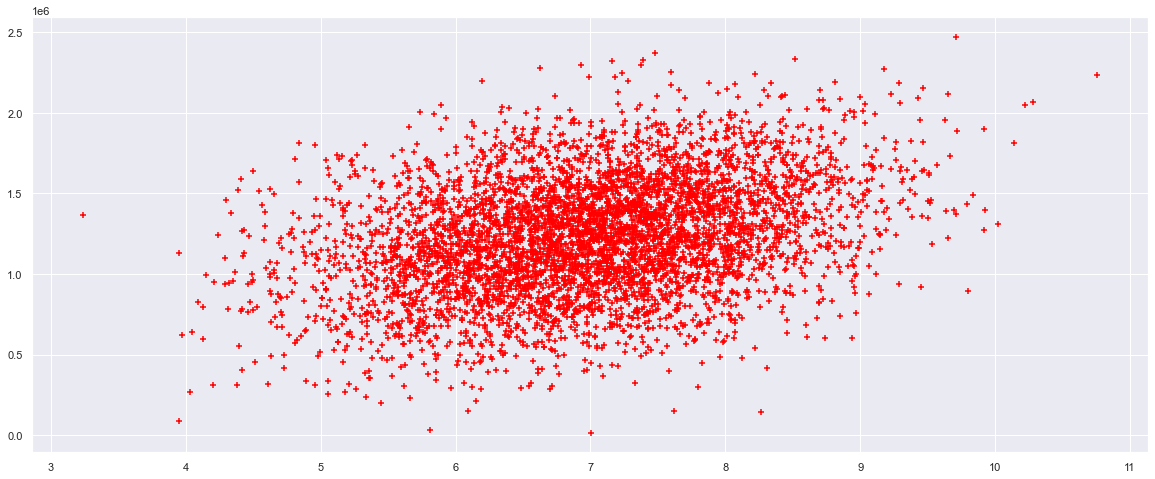

In [135]:
plt.scatter(df['Avg. Area Number of Rooms'],df['Price'],marker='+',color='red')

we can see that the price of the house increase by no of room increase

Using quantile method to detect and remove outliers

In [180]:
min_p,max_p=df.Price.quantile([0.1,0.99])

In [181]:
min_p

772031.7749318084

In [182]:
max_p

2050597.9900180437

In [183]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [184]:
df[df.Price<min_p]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.489339,USNS Raymond\nFPO AE 09386
11,50593.695497,4.496513,7.467627,4.49,34343.991886,663732.396896,"911 Castillo Park Apt. 717\nDavisborough, PW 7..."
17,61929.077018,4.788550,5.097010,4.30,24595.901498,528485.246731,"5498 Rachel Locks\nNew Gregoryshire, PW 54755"
22,64490.650267,4.210323,5.478088,4.31,40358.960106,718887.231501,"95198 Ortiz Key\nPort Sara, TN 24541-2855"
23,60697.351539,6.170484,7.150537,6.34,28140.967088,743999.819160,"9003 Jay Plains Suite 838\nLake Elizabeth, IN ..."
...,...,...,...,...,...,...,...
4941,62968.650709,5.293690,5.457162,3.25,24554.562521,556839.637132,"02689 George Hill\nLake Chadton, MS 30265"
4946,81602.539355,3.719436,6.170817,2.14,18687.509702,757719.658615,"73637 White Bridge\nWest Kimberlyville, IL 148..."
4948,56397.319136,5.273051,8.032969,5.32,27647.448686,748322.708245,"90515 Billy Field Apt. 071\nLake Ronaldton, WY..."
4951,64311.304841,5.472332,6.133704,3.43,19420.433513,696139.261363,"0474 Amber Pines Suite 323\nSouth Michael, MD ..."


In [185]:
len(df[df.Price<min_p])

500

In [186]:
df[df.Price>max_p]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
20,86294.999089,6.627457,8.011898,4.07,47560.775336,2.146925e+06,"030 Larry Park Suite 665\nThomashaven, HI 8794..."
126,85845.317799,6.743653,9.468766,3.46,46477.678685,2.152959e+06,"255 Sosa Pines Suite 751\nWilsonview, MT 31615"
256,91159.418327,6.536045,7.373851,3.01,54861.091097,2.298379e+06,"170 Smith Wall\nSouth Christopherhaven, AZ 87521"
355,87266.340225,8.248959,7.234261,5.00,45161.187677,2.249123e+06,"03567 Scott Fork\nWest Lisahaven, ND 55466-3035"
417,94902.237220,6.370867,8.423788,3.01,41662.083634,2.106511e+06,2055 Rodriguez Light Suite 472\nSouth Davidvie...
465,90592.469609,7.700132,9.708803,5.19,37223.876167,2.469066e+06,USNS Vargas\nFPO AE 56319-6904
498,86305.365141,8.064453,7.203916,4.17,37854.373451,2.056693e+06,"272 King Mountain Suite 538\nNew Jennifer, NC ..."
581,80015.549733,6.140990,8.848999,3.15,52469.765445,2.084884e+06,"728 Willie Radial\nYorkstad, IN 28387"
622,90890.485814,7.510171,7.595487,6.21,45519.256271,2.252243e+06,"05117 Williams Isle\nMariaton, DC 32652-0435"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"


In [187]:
len(df[df.Price>max_p])

50

In [188]:
df2=df[(df.Price<max_p) & (df.Price>min_p)]

In [189]:
df2.shape

(4450, 7)

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

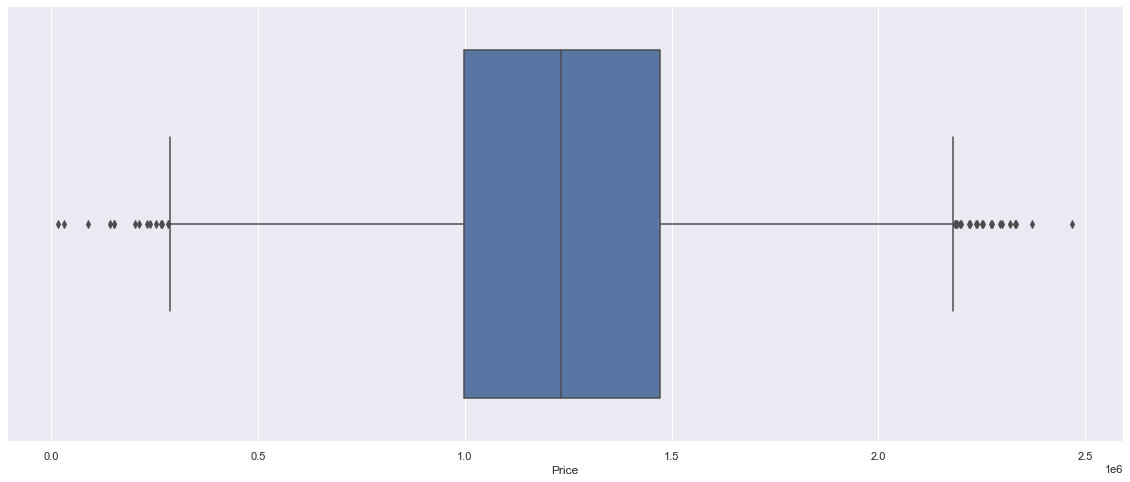

In [190]:
sns.boxplot(df.Price)

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

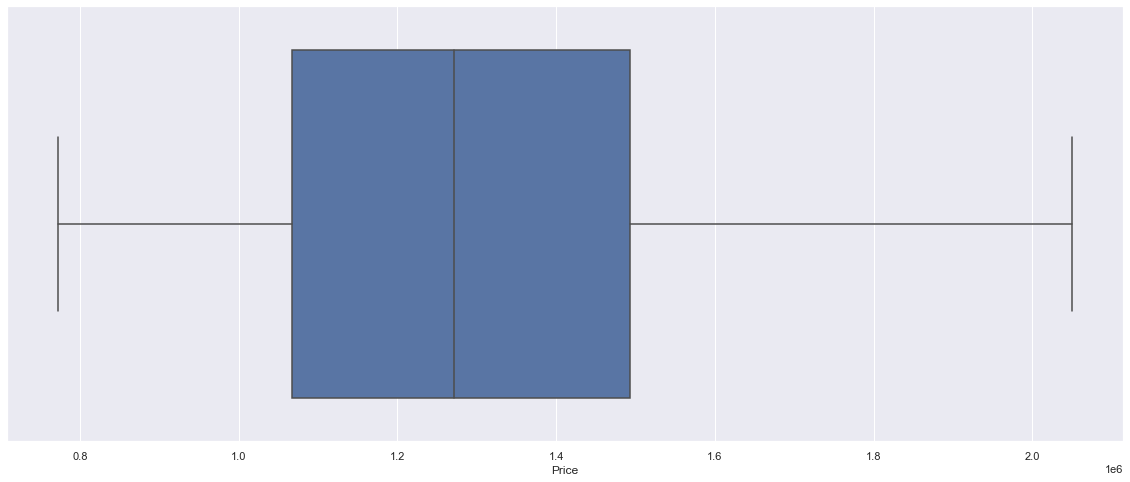

In [191]:
sns.boxplot(df2.Price)

we can see that the outiler has been remooved properly from the dataframe and we name new dataframe is df2

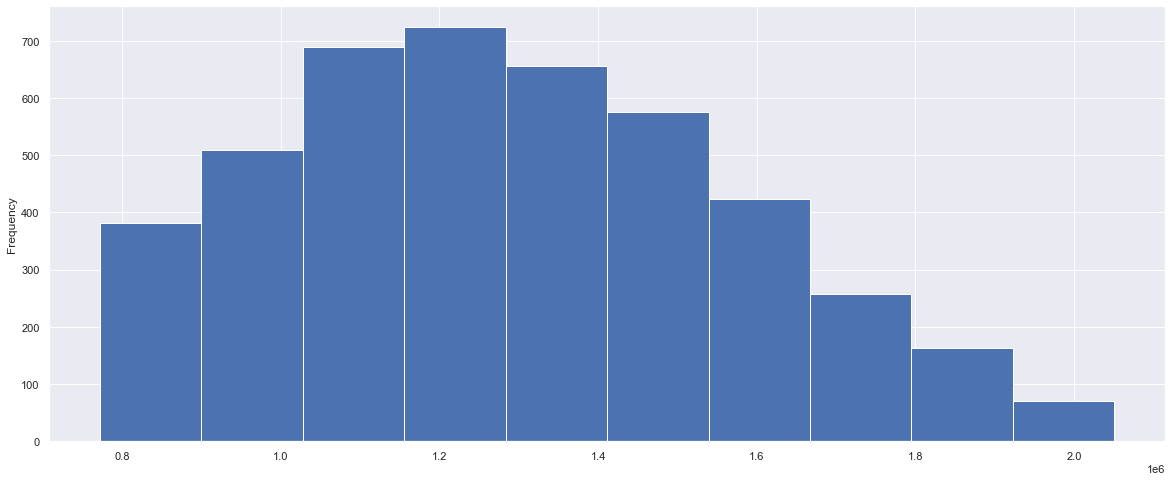

In [192]:
df2.Price.plot.hist()
sns.set(rc={'figure.figsize':(15,8)})
# sns.set(rc={'figure.figsize':(15,8)})
# we concluded from  this histogram plot that the max number of house as brought in 10 to 15
# this plot is perfectly distributed

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

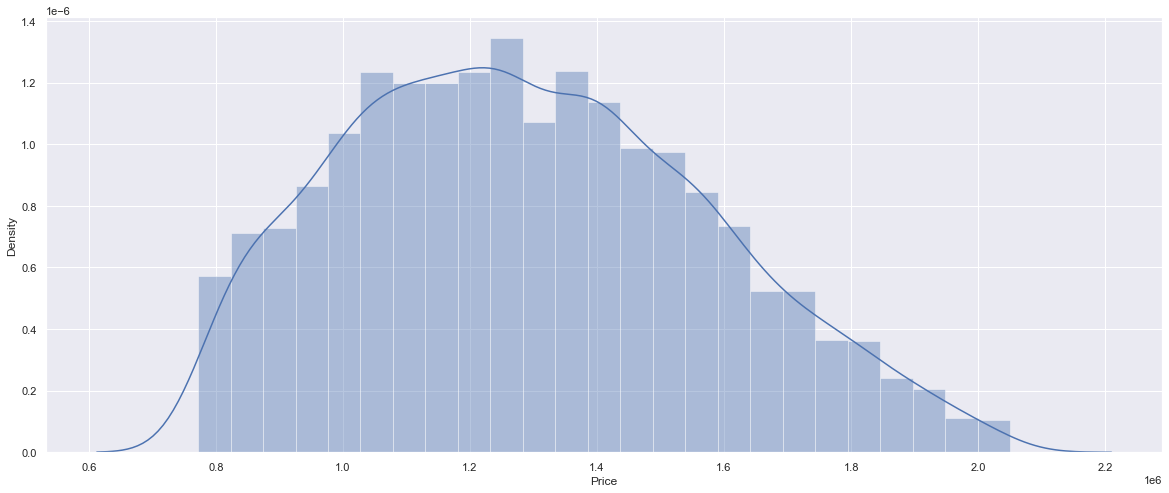

In [222]:
sns.distplot(df2.Price)

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

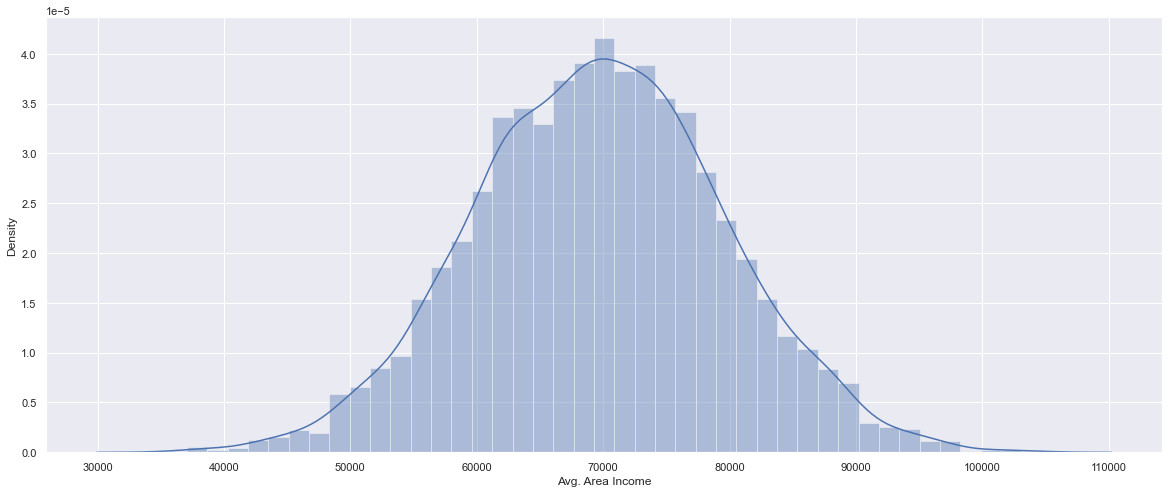

In [225]:
sns.distplot(df2['Avg. Area Income'])

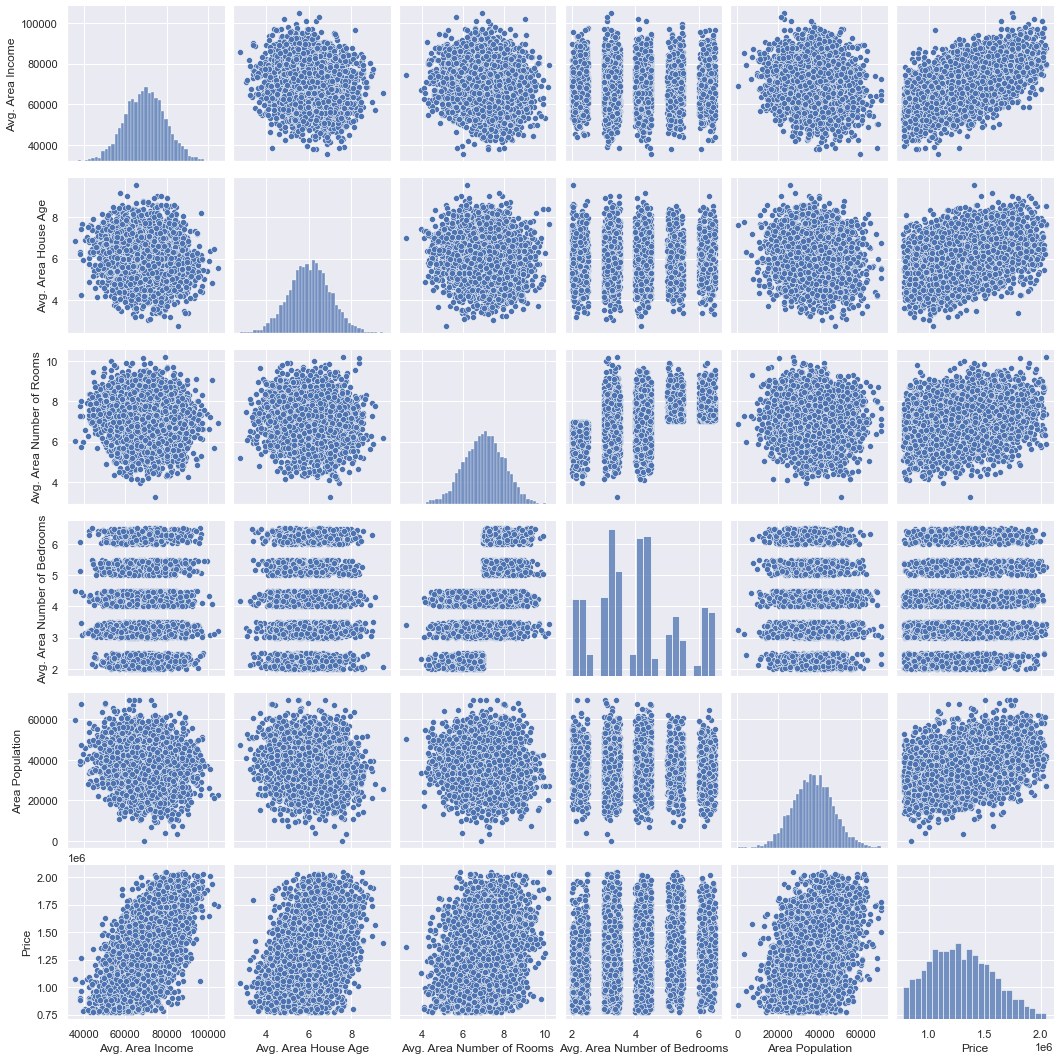

In [193]:
sns.pairplot(df2)

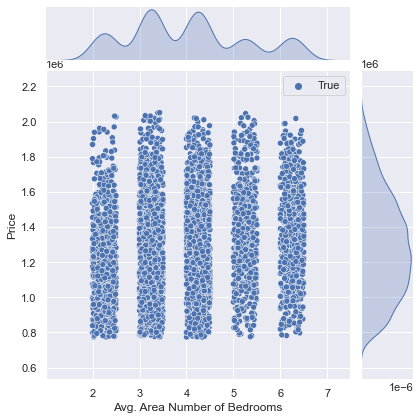

In [194]:
sns.jointplot(x='Avg. Area Number of Bedrooms',y='Price',data =df2 ,hue=True)
sns.set(rc={'figure.figsize':(20,8)})
# sns.joimtplot(x='Avg',y='POrice'.data=df,hue=true)
# sns.set(rc={'figure.figsize':(20,15)})


In [195]:
df2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."


In [196]:
# we don't required address so we are dropping it

In [197]:
df2.drop('Address',inplace=True,axis=1)

C:\Users\ravit\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [198]:
df2.head()
# confirming the address column is dropped

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06


 Assigning feature and target value for prediction

In [200]:
x= df2[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]


In [201]:
y=df2[['Price']]

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
scaler=StandardScaler()

In [204]:
x_scaler=scaler.fit_transform(x)

In [205]:
x_scaler

array([[ 0.99911692, -0.39194776, -0.03135277,  0.05920279, -1.41830912],
       [ 0.96900071, -0.0576544 , -0.31515973, -0.74481472,  0.34578139],
       [-0.85345599, -0.20076695,  1.50156859,  0.895381  ,  0.00600756],
       ...,
       [-0.64001391,  1.24560994, -2.27853247, -1.51667153, -0.36733169],
       [-0.17219862, -0.54703381,  0.09196666,  1.14462643,  0.59899735],
       [-0.42492049, -0.0687208 , -0.25244252,  0.04312244,  0.99914442]])

# MODEL BUILDING

In [206]:
from sklearn.model_selection import train_test_split


In [207]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=2)

In [208]:
x_train.shape

(3560, 5)

In [209]:
y_train.shape

(3560, 1)

In [210]:
x_test.shape

(890, 5)

In [211]:
y_test.shape

(890, 1)

In [212]:
from sklearn.linear_model import LinearRegression



In [213]:
lm=LinearRegression()

In [214]:
lm.fit(x_train,y_train)

LinearRegression()

In [215]:
y_predict=lm.predict(x_train)

In [216]:
y_predict

array([[1376191.88505088],
       [1723783.24018909],
       [1149357.59880573],
       ...,
       [1820251.03324956],
       [1331952.22937404],
       [1263457.37952339]])

In [217]:
y_test_predict=lm.predict(x_test)

In [218]:
y_test_predict[:5]

array([[1442799.36585356],
       [1040865.18514928],
       [1898737.43597396],
       [1296785.64041243],
       [1115478.32019533]])

In [219]:
# checking error by using mean squared error

In [220]:
from sklearn.metrics import mean_squared_error

In [221]:
mean_squared_error(y_test_predict,y_test)

9693718612.430433